<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. Also tries to answer the following question.

** *Do science fiction movies tend to be rated more highly than other movie genres?* **

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reading movies dataset

In [2]:
movies = pd.read_csv('C:\\Users\\venugopal\\Desktop\\Venu\\courses\\Datasets\\movielens\\movies.csv', sep=',')
movies.head(n = 1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Extracting the list of the genres available in movies dataset

In [3]:
genres = list({gen.split('|')[0] for gen in movies.genres})
genres.remove('(no genres listed)')
print(genres)

['Western', 'Film-Noir', 'Musical', 'IMAX', 'Crime', 'Thriller', 'Fantasy', 'Animation', 'Horror', 'Mystery', 'Action', 'Documentary', 'Romance', 'Adventure', 'Sci-Fi', 'Drama', 'Children', 'War', 'Comedy']


Adding all genres as columns with boolean type, True if movie belongs to that genre or false otherwise

In [4]:
cols = movies.columns.values
cols = np.append(cols, list(genres))
movies_genr_expaned = pd.DataFrame(movies, columns=cols)
movies_genr_expaned = movies_genr_expaned.fillna(False)
for genr in genres:
    movies_genr_expaned[genr] = movies_genr_expaned['genres'].str.contains(genr)

** Genres distribution by movie counts **

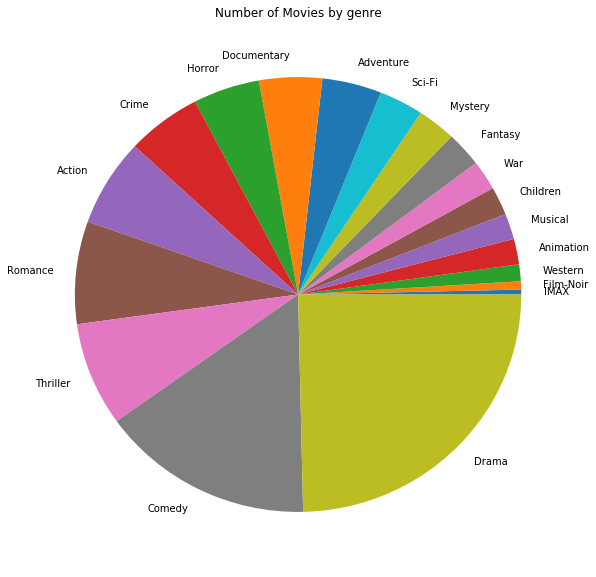

In [5]:
movies_genr_expaned[genres].sum().sort_values().plot(kind='pie', figsize=(10,10), title = "Number of Movies by genre", label = "")

Pecentages of movies counts by genres

In [10]:
movies_genr_expaned[genres].sum().sort_values()/movies_genr_expaned[genres].sum().sum()*100

IMAX            0.361891
Film-Noir       0.609306
Western         1.248154
Animation       1.896233
Musical         1.912851
Children        2.103028
War             2.204579
Fantasy         2.607090
Mystery         2.795421
Sci-Fi          3.218242
Adventure       4.300222
Documentary     4.562408
Horror          4.820901
Crime           5.426514
Action          6.499261
Romance         7.620015
Thriller        7.714180
Comedy         15.461595
Drama          24.638109
dtype: float64

Reading ratings dataset

In [11]:
ratings = pd.read_csv('C:\\Users\\venugopal\\Desktop\\Venu\\courses\\Datasets\\movielens\\ratings.csv', sep=',')
ratings.head(n=1)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027


** Joining dataframes ratings and movies together **

In [12]:
joined_tables = pd.merge(ratings, movies_genr_expaned, how='inner')
joined_tables.head(n=3)

,userId,movieId,rating,timestamp,title,genres,Western,Film-Noir,Musical,IMAX,...,Mystery,Action,Documentary,Romance,Adventure,Sci-Fi,Drama,Children,War,Comedy
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


** Genres distribution by average ratings **
Average ratings will be affected by the number of movies in the genres.

(3.0, 4.0)

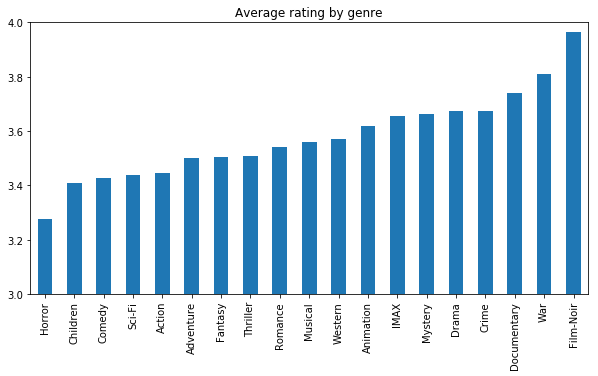

In [13]:
avg_ratings = {genr : joined_tables[joined_tables[genr]]['rating'].mean() for genr in genres}
avg_ratings = pd.Series(avg_ratings)
ax = avg_ratings.sort_values().plot(kind='bar', figsize=(10,5), title = "Average rating by genre")
ax.set_ylim(3.0,4.0)

**Categorize ratings ** <br>
<p>< 2.5               Low_rating <br>
>= 2.5 and < 4.0    Mid_rating <br>
>=4.0               High_Rating <br> <br>
Distribution of movie counts based on genres for low, mid and high ratings</p>

In [14]:
low_rating_filter = joined_tables['rating'] < 2.5
med_rating_filter = (joined_tables['rating'] >= 2.5) & (joined_tables['rating'] < 4)
high_rating_filter = joined_tables['rating'] >= 4
ratings_range_dict = {genr : {'Low_rating': joined_tables[joined_tables[genr] & low_rating_filter]['rating'].count(),
                      'Mid_rating': joined_tables[joined_tables[genr] & med_rating_filter]['rating'].count(),
                      'High_rating': joined_tables[joined_tables[genr] & high_rating_filter]['rating'].count()}
               for genr in genres}

In [15]:
ratings_by_range = pd.DataFrame(ratings_range_dict).transpose()
ratings_by_range.index.name = "Genre"
ratings_by_range.reset_index(inplace=True)
ratings_by_range = ratings_by_range.sort_values(by=['Low_rating','Mid_rating', 'High_rating'])
ratings_by_range

,Genre,High_rating,Low_rating,Mid_rating
9,Film-Noir,150955,11426,54308
6,Documentary,147094,20610,76915
11,IMAX,263032,43729,185605
18,Western,218914,49374,155426
17,War,650708,84576,313334
12,Musical,446279,106580,318056
2,Animation,605177,116610,418689
13,Mystery,866859,158458,531965
3,Children,754487,261243,653519
8,Fantasy,1028131,288853,794419


** By percentage **

In [16]:
ratings_by_range = pd.DataFrame(ratings_range_dict)
ratings_by_range = ratings_by_range.div(ratings_by_range.sum()) * 100
ratings_by_range = ratings_by_range.transpose()
ratings_by_range.index.name = "Genre"
ratings_by_range.reset_index(inplace=True)
ratings_by_range = ratings_by_range.sort_values(by=['Low_rating','Mid_rating', 'High_rating'])
ratings_by_range

,Genre,High_rating,Low_rating,Mid_rating
9,Film-Noir,69.664358,5.272995,25.062647
17,War,62.053865,8.065473,29.880662
6,Documentary,60.131879,8.425347,31.442774
11,IMAX,53.422048,8.881401,37.696551
7,Drama,56.011406,9.656313,34.332281
5,Crime,55.917152,9.967787,34.115061
13,Mystery,55.664870,10.175293,34.159837
2,Animation,53.063545,10.224678,36.711776
18,Western,51.665510,11.652671,36.681818
12,Musical,51.242544,12.237704,36.519752


** Create bar plots to compare low rating, mid rating, high rating movies accross genres

(0.625, 20.125)

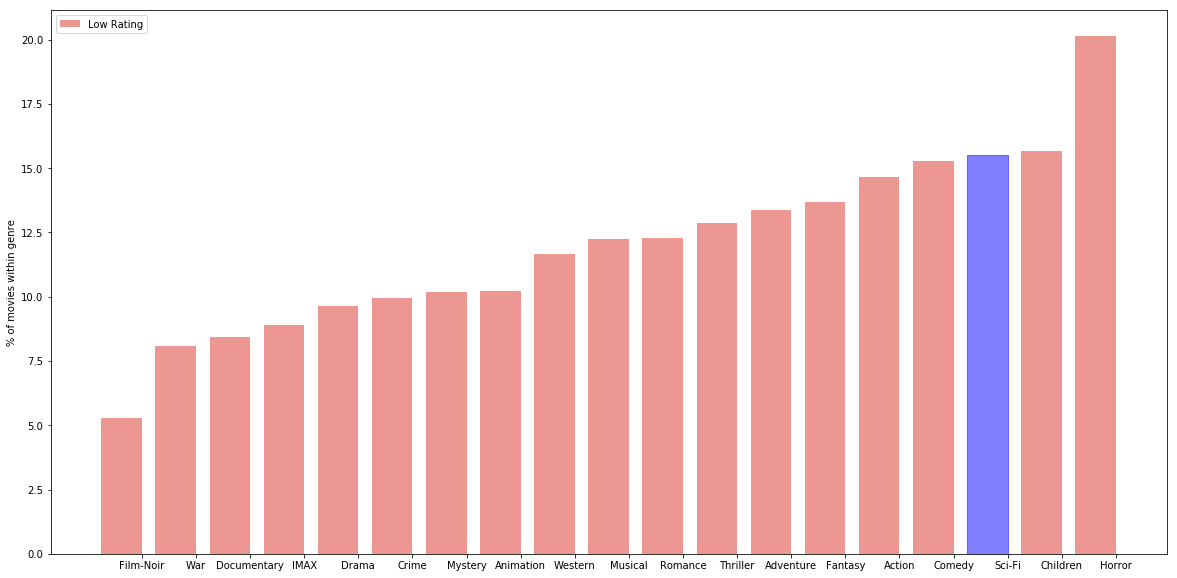

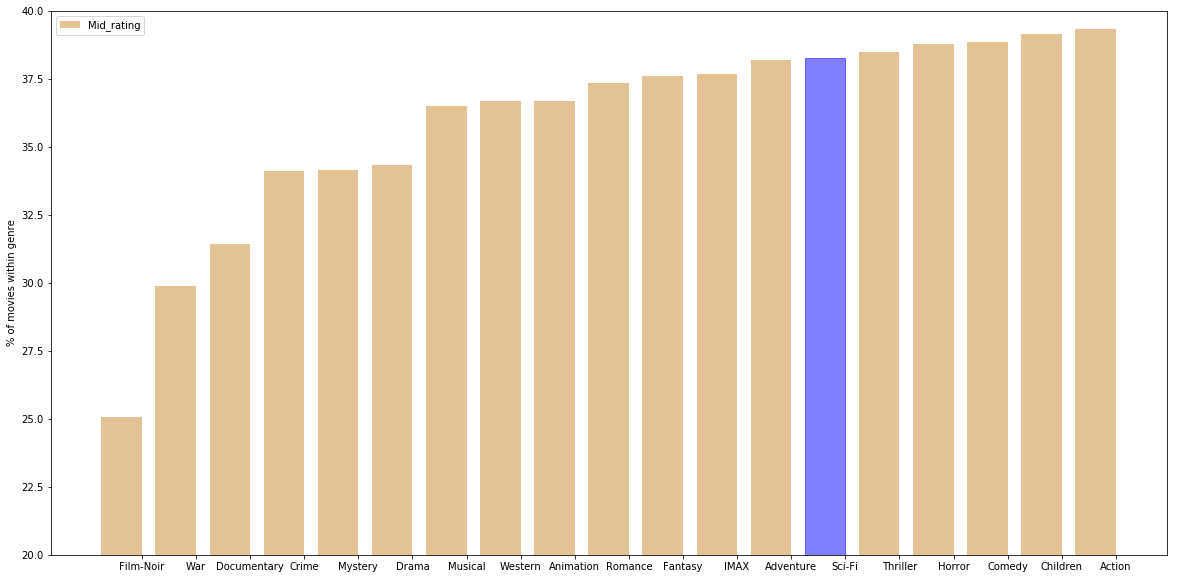

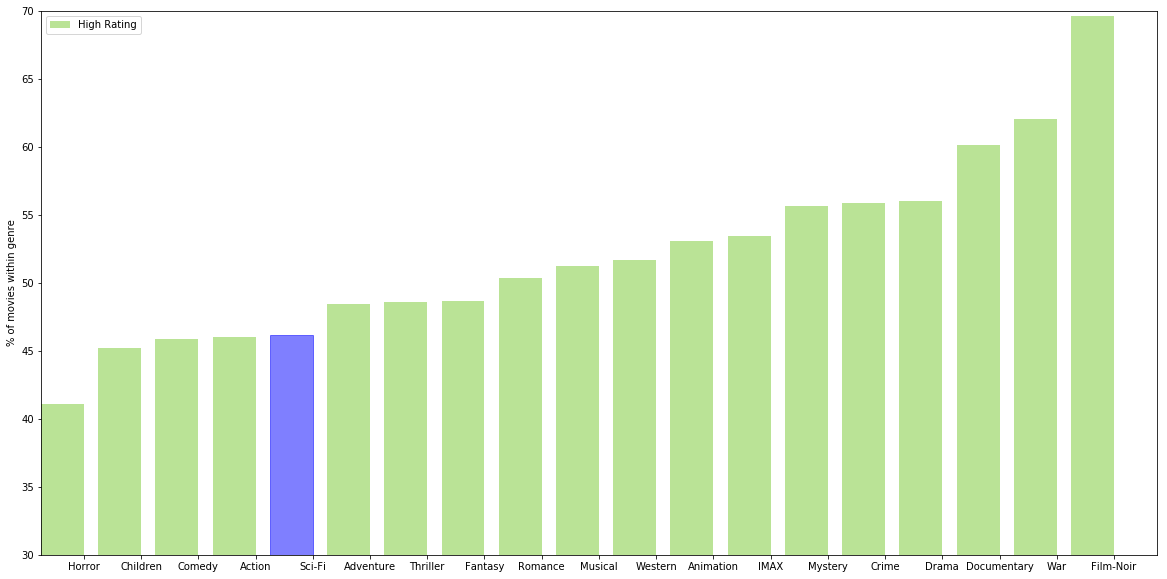

In [27]:

f1, ax1 = plt.subplots(1, figsize=(20,10))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(ratings_by_range['High_rating']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

ratings_by_range = ratings_by_range.sort_values(by=['Low_rating'])
b0 = ax1.bar(bar_l,
        ratings_by_range['Low_rating'],
        width=bar_width,
        label='Low Rating',
        alpha=0.5,
        color='#dd3127')
plt.xticks(tick_pos, ratings_by_range['Genre'])
ax1.set_ylabel('% of movies within genre')
plt.legend(loc='upper left')
b0[16].set_color('b')

f2, ax2 = plt.subplots(1, figsize=(20,10))
ratings_by_range = ratings_by_range.sort_values(by=['Mid_rating'])

b1 = ax2.bar(bar_l,
        ratings_by_range['Mid_rating'],
        width=bar_width,
        label='Mid_rating',
        alpha=0.5,
        color='#c9882d')
b1[13].set_color('b')
ax2.set_ylabel('% of movies within genre')
ax2.set_ylim(20,40)
plt.xticks(tick_pos, ratings_by_range['Genre'])
plt.legend(loc='upper left')

f3, ax3 = plt.subplots(1, figsize=(20,10))
ratings_by_range = ratings_by_range.sort_values(by=['High_rating'])
b2 = ax3.bar(bar_l,
        ratings_by_range['High_rating'],
        width=bar_width,
        label='High Rating',
        alpha=0.5,
        color='#76c92e')

# set the x ticks with names
plt.xticks(tick_pos, ratings_by_range['Genre'])
b2[4].set_color('b')
ax3.set_ylabel('% of movies within genre')
ax3.set_ylim(30,70)

# Set the label and legends
plt.legend(loc='upper left')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])